In [99]:
!pip install fake-useragent
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import date

# 1. Сбор данных (пиратим)

In [100]:
# Парсим NASDAQ

url = 'https://finance.yahoo.com/quote/%5EIXIC/history?period1=1167609600&period2=1714068186'

response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
tree = BeautifulSoup(response.content)
ans = []
temp = []
for i in tree.find_all('td', {'class': 'svelte-ewueuo'}):
  try:
    temp.append(float(i.text.replace(',', '')))
  except:
    ans.append(temp)
    temp = [i.text.replace(',', '')]
ans.append(temp)
nsdq = pd.DataFrame(ans[1:], columns = ['Date',	'Open',	'High',	'Low',	'Close', 	'Adj Close', 	'Volume'])
nsdq

,Date,Open,High,Low,Close,Adj Close,Volume
0,Apr 25 2024,15375.26,15644.51,15343.91,15611.76,15611.76,4.743640e+09
1,Apr 24 2024,15805.60,15839.00,15634.44,15712.75,15712.75,4.735870e+09
2,Apr 23 2024,15525.55,15730.35,15510.59,15696.64,15696.64,4.951670e+09
3,Apr 22 2024,15396.13,15539.00,15265.66,15451.31,15451.31,4.616730e+09
4,Apr 19 2024,15547.10,15576.70,15222.78,15282.01,15282.01,5.316010e+09
...,...,...,...,...,...,...,...
4353,Jan 9 2007,2443.26,2449.87,2423.56,2443.83,2443.83,2.144160e+09
4354,Jan 8 2007,2435.25,2445.63,2421.13,2438.20,2438.20,1.905620e+09
4355,Jan 5 2007,2445.07,2445.07,2420.59,2434.25,2434.25,2.060360e+09
4356,Jan 4 2007,2423.82,2460.51,2413.75,2453.43,2453.43,2.104210e+09


In [101]:
# Парсим S&P500

url = 'https://finance.yahoo.com/quote/%5EGSPC/history?period1=1167609600&period2=1714070686'

response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
tree = BeautifulSoup(response.content)
ans = []
temp = []
for i in tree.find_all('td', {'class': 'svelte-ewueuo'}):
  try:
    temp.append(float(i.text.replace(',', '')))
  except:
    ans.append(temp)
    temp = [i.text.replace(',', '')]
ans.append(temp)
sp = pd.DataFrame(ans[1:], columns = ['Date',	'Open',	'High',	'Low',	'Close', 	'Adj Close', 	'Volume'])
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,Apr 25 2024,5019.88,5057.75,4990.58,5048.42,5048.42,3.958050e+09
1,Apr 24 2024,5084.86,5089.48,5047.02,5071.63,5071.63,3.656740e+09
2,Apr 23 2024,5028.85,5076.12,5027.96,5070.55,5070.55,3.751400e+09
3,Apr 22 2024,4987.33,5038.84,4969.40,5010.60,5010.60,3.820250e+09
4,Apr 19 2024,5005.44,5019.02,4953.56,4967.23,4967.23,3.878750e+09
...,...,...,...,...,...,...,...
4353,Jan 9 2007,1412.84,1415.61,1405.42,1412.11,1412.11,3.038380e+09
4354,Jan 8 2007,1409.26,1414.98,1403.97,1412.84,1412.84,2.763340e+09
4355,Jan 5 2007,1418.34,1418.34,1405.75,1409.71,1409.71,2.919400e+09
4356,Jan 4 2007,1416.60,1421.84,1408.43,1418.34,1418.34,3.004460e+09


In [102]:
# Парсим Bitcoin

url = 'https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1714071622'

response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
tree = BeautifulSoup(response.content)
ans = []
temp = []
for i in tree.find_all('td', {'class': 'svelte-ewueuo'}):
  try:
    temp.append(float(i.text.replace(',', '')))
  except:
    ans.append(temp)
    temp = [i.text.replace(',', '')]
ans.append(temp)
btc = pd.DataFrame(ans[1:], columns = ['Date',	'Open',	'High',	'Low',	'Close', 	'Adj Close', 	'Volume'])
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,Apr 25 2024,64275.02,65275.21,62783.63,64481.71,64481.71,3.215579e+10
1,Apr 24 2024,66408.72,67075.37,63589.87,64276.90,64276.90,3.027666e+10
2,Apr 23 2024,66839.89,67199.24,65864.87,66407.27,66407.27,2.431098e+10
3,Apr 22 2024,64935.63,67233.96,64548.18,66837.68,66837.68,2.828269e+10
4,Apr 21 2024,64992.82,65723.24,64277.72,64926.64,64926.64,2.050664e+10
...,...,...,...,...,...,...,...
3504,Sep 21 2014,408.08,412.43,393.18,398.82,398.82,2.658010e+07
3505,Sep 20 2014,394.67,423.30,389.88,408.90,408.90,3.686360e+07
3506,Sep 19 2014,424.10,427.83,384.53,394.80,394.80,3.791970e+07
3507,Sep 18 2014,456.86,456.86,413.10,424.44,424.44,3.448320e+07


In [103]:
# Парсим цены на нефть WTI

url = 'https://finance.yahoo.com/quote/CL%3DF/history?period1=1167609600&period2=1714071347'

response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
tree = BeautifulSoup(response.content)
ans = []
temp = []
for i in tree.find_all('td', {'class': 'svelte-ewueuo'}):
  try:
    temp.append(float(i.text.replace(',', '')))
  except:
    ans.append(temp)
    temp = [i.text.replace(',', '')]
ans.append(temp)
oil = pd.DataFrame(ans[1:], columns = ['Date',	'Open',	'High',	'Low',	'Close', 	'Adj Close', 	'Volume'])
oil

,Date,Open,High,Low,Close,Adj Close,Volume
0,Apr 25 2024,82.83,83.83,81.99,83.57,83.57,314116.0
1,Apr 24 2024,83.40,83.71,82.44,82.81,82.81,329077.0
2,Apr 23 2024,82.13,83.43,80.88,83.36,83.36,355814.0
3,Apr 22 2024,83.05,83.35,81.85,82.85,82.85,313914.0
4,Apr 19 2024,82.62,86.28,81.80,83.14,83.14,76901.0
...,...,...,...,...,...,...,...
4354,Jan 8 2007,56.24,57.72,55.10,56.09,56.09,298727.0
4355,Jan 5 2007,55.41,56.40,54.90,56.31,56.31,250130.0
4356,Jan 4 2007,58.35,58.58,55.39,55.59,55.59,324010.0
4357,Jan 3 2007,60.95,60.97,57.72,58.32,58.32,248547.0


In [104]:
# Парсим цены на Gold

url = 'https://finance.yahoo.com/quote/GC%3DF/history?period1=1167609600&period2=1714074922'

response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
tree = BeautifulSoup(response.content)
ans = []
temp = []
for i in tree.find_all('td', {'class': 'svelte-ewueuo'}):
  try:
    temp.append(float(i.text.replace(',', '')))
  except:
    ans.append(temp)
    temp = [i.text.replace(',', '')]
ans.append(temp)
gld = pd.DataFrame(ans[1:], columns = ['Date',	'Open',	'High',	'Low',	'Close', 	'Adj Close', 	'Volume'])
gld

,Date,Open,High,Low,Close,Adj Close,Volume
0,Apr 25 2024,2315.0,2329.8,2305.0,2329.8,2329.8,1024.0
1,Apr 24 2024,2321.3,2328.7,2314.6,2324.5,2324.5,95.0
2,Apr 23 2024,2327.7,2330.8,2294.2,2327.7,2327.7,171.0
3,Apr 22 2024,2383.3,2383.3,2326.9,2332.2,2332.2,53.0
4,Apr 19 2024,2379.3,2399.8,2377.3,2398.4,2398.4,160.0
...,...,...,...,...,...,...,...
4415,Jan 8 2007,607.5,607.5,607.5,607.5,607.5,1000.0
4416,Jan 5 2007,623.7,623.7,617.3,604.9,604.9,531.0
4417,Jan 4 2007,624.5,624.5,624.5,623.9,623.9,4.0
4418,Jan 3 2007,640.4,640.4,628.5,627.1,627.1,38.0


In [105]:
# Парсим инфляцию в США

url = 'https://www.rateinflation.com/inflation-rate/usa-historical-inflation-rate/'

response = requests.get(url)
tree = BeautifulSoup(response.content)
ans = []
sht = ['skip', 'Jan',	'Feb',	'Mar',	'Apr',	'May',	'Jun',	'Jul',	'Aug',	'Sep',	'Oct',	'Nov',	'Dec',	'Annual']
final = []
for year in list(range(1914, 2025))[::-1]:
  for month in sht:
    final.append(month + ' ' + str(year))
for i, j in zip(tree.tbody.find_all('td'), final):
  temp = []
  if '%' in i.text:
    temp.append(j)
    temp.append(float(i.text.replace('%', '')))
    ans.append(temp)
inf1 = pd.DataFrame(ans, columns = ['Date', 'Inflation Rate in USA'])
inf1.drop(inf1.loc[inf1.Date.str.contains('Annual')].index, inplace=True)
inf1.head(20)

,Date,Inflation Rate in USA
0,Jan 2024,3.091
1,Feb 2024,3.153
2,Mar 2024,3.477
3,Apr 2024,3.357
4,Jan 2023,6.410
5,Feb 2023,6.036
6,Mar 2023,4.985
7,Apr 2023,4.930
8,May 2023,4.048
9,Jun 2023,2.969


In [106]:
# Парсим ключ ФРС

url = 'https://fred.stlouisfed.org/series/DFEDTARU'
response = requests.get(url)
tree = BeautifulSoup(response.content, 'html.parser')
smth = tree.find_all('td', {'colspan': '2'})
src = smth[0].a.get('href')
new_url = 'https://fred.stlouisfed.org' + src
response_2 = requests.get(new_url)
fin = str(response_2.content).strip("b").strip("'")
grand_fin = fin.split('\\r\\n')
fst = grand_fin.index('DATE       VALUE') + 1
grand_fin = grand_fin[fst:]
sht = np.array(list(map(str.split, grand_fin))[:-1])
key1 = pd.DataFrame(sht, columns = ['Date', 'Interest Rate (Upper)'])
key1

,Date,Interest Rate (Upper)
0,2008-12-16,0.25
1,2008-12-17,0.25
2,2008-12-18,0.25
3,2008-12-19,0.25
4,2008-12-20,0.25
...,...,...
5643,2024-05-29,5.50
5644,2024-05-30,5.50
5645,2024-05-31,5.50
5646,2024-06-01,5.50


In [107]:
# Парсим безработицу

url = 'https://fred.stlouisfed.org/series/UNRATE#0'
response = requests.get(url)
tree = BeautifulSoup(response.content, 'html.parser')
smth = tree.find_all('td', {'colspan': '2'})
src = smth[0].a.get('href')
new_url = 'https://fred.stlouisfed.org' + src
response_2 = requests.get(new_url)
lst = str(response_2.content).strip('b"').strip('"<').split('\\r\\n')
fst = lst.index('DATE       VALUE') + 1
vs = list(map(str.split, lst[fst:]))
normis = np.array(vs[:-1])
unemp1 = pd.DataFrame(normis, columns = ['Date', 'Unemployment Rate'])
unemp1

,Date,Unemployment Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
911,2023-12-01,3.7
912,2024-01-01,3.7
913,2024-02-01,3.9
914,2024-03-01,3.8


# 2. Создаем датасет


## 2.1. Убираем ненужные столбцы, делаем все данные дневными.


In [108]:
# BTC данные с 17 сент 2014 по 25 апреля 2024
bitcoin = btc[['Date', "Open"]]
bitcoin = bitcoin.rename(columns = {"Open":"BTC_price"})
bitcoin.head(10)

,Date,BTC_price
0,Apr 25 2024,64275.02
1,Apr 24 2024,66408.72
2,Apr 23 2024,66839.89
3,Apr 22 2024,64935.63
4,Apr 21 2024,64992.82
5,Apr 20 2024,63851.10
6,Apr 19 2024,63510.75
7,Apr 18 2024,61275.32
8,Apr 17 2024,63831.85
9,Apr 16 2024,63419.30


In [109]:
# NASDAQ данные с 17 января 2007 по 25 апреля 2024
nasdaq = nsdq[['Date', "Open"]]
nasdaq = nasdaq.rename(columns = {"Open":"NASDAQ_price"})
nasdaq.head(10)

,Date,NASDAQ_price
0,Apr 25 2024,15375.26
1,Apr 24 2024,15805.60
2,Apr 23 2024,15525.55
3,Apr 22 2024,15396.13
4,Apr 19 2024,15547.10
5,Apr 18 2024,15705.69
6,Apr 17 2024,15942.29
7,Apr 16 2024,15856.38
8,Apr 15 2024,16276.47
9,Apr 12 2024,16293.03


In [110]:
# S&P500 данные с 17 января 2007 по 25 апреля 2024
sp500 = sp[['Date', "Open"]]
sp500 = sp500.rename(columns = {"Open":"S&P500_price"})
sp500.head(10)

,Date,S&P500_price
0,Apr 25 2024,5019.88
1,Apr 24 2024,5084.86
2,Apr 23 2024,5028.85
3,Apr 22 2024,4987.33
4,Apr 19 2024,5005.44
5,Apr 18 2024,5031.52
6,Apr 17 2024,5068.97
7,Apr 16 2024,5064.59
8,Apr 15 2024,5149.67
9,Apr 12 2024,5171.51


In [111]:
# WTI данные с 17 января 2007 по 25 апреля 2024
wti = oil[['Date', "Open"]]
wti = wti.rename(columns = {"Open":"WTI_price"})
wti.head(10)

,Date,WTI_price
0,Apr 25 2024,82.83
1,Apr 24 2024,83.40
2,Apr 23 2024,82.13
3,Apr 22 2024,83.05
4,Apr 19 2024,82.62
5,Apr 18 2024,82.79
6,Apr 17 2024,85.36
7,Apr 16 2024,85.70
8,Apr 15 2024,85.93
9,Apr 12 2024,85.60


In [112]:
# Gold данные с 12 января 2007 по 25 апреля 2024
gold = gld[['Date', "Open"]]
gold = gold.rename(columns = {"Open":"GOLD_price"})
gold.head(10)

,Date,GOLD_price
0,Apr 25 2024,2315.0
1,Apr 24 2024,2321.3
2,Apr 23 2024,2327.7
3,Apr 22 2024,2383.3
4,Apr 19 2024,2379.3
5,Apr 18 2024,2368.4
6,Apr 17 2024,2384.2
7,Apr 16 2024,2384.0
8,Apr 15 2024,2362.1
9,Apr 12 2024,2377.3


In [113]:
# Работаем с безработицей, данные - месячные, делаем так, чтобы были дневные. Данные есть с 1948 по 2024
import calendar

inf = inf1.rename(columns = {"Inflation Rate in USA":"US Inflation"})
inf['Date'] = pd.to_datetime(inf['Date'])

# Создаем новый DataFrame с ежедневными значениями
daily_inf = pd.DataFrame(columns=['Date', 'US Inflation'])

for index, row in inf.iterrows():
    month = row['Date'].month
    year = row['Date'].year
    days_in_month = calendar.monthrange(year, month)[1]

    daily_values_inf = pd.DataFrame({'Date': [pd.Timestamp(year=year, month=month, day=i) for i in range(1, days_in_month + 1)],
                                 'US Inflation': row['US Inflation']})

    daily_inf = pd.concat([daily_inf, daily_values_inf], ignore_index=True)
daily_inf['US Inflation'] = pd.to_numeric(daily_inf['US Inflation'])
daily_inf.head()

<ipython-input-113-1d6007a68fce>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inf['Date'] = pd.to_datetime(inf['Date'])


,Date,US Inflation
0,2024-01-01,3.091
1,2024-01-02,3.091
2,2024-01-03,3.091
3,2024-01-04,3.091
4,2024-01-05,3.091


In [114]:
# Ставка ФРС данные с 12 января 2007 по 28 апреля 2024
key = key1[::-1]
key = key.rename(columns = {"Interest Rate (Upper)":"US Interest Rate"})
key['US Interest Rate'] = pd.to_numeric(key['US Interest Rate'])
key.head()

,Date,US Interest Rate
5647,2024-06-02,5.5
5646,2024-06-01,5.5
5645,2024-05-31,5.5
5644,2024-05-30,5.5
5643,2024-05-29,5.5


In [115]:
# Работаем с безработицей, данные - месячные, делаем так, чтобы были дневные. Данные есть с 1948 по 2024
import calendar

unemp = unemp1.rename(columns = {"Unemployment Rate":"US Unemployment Rate"})
unemp['Date'] = pd.to_datetime(unemp['Date'])

# Создаем новый DataFrame с ежедневными значениями
daily_unemp = pd.DataFrame(columns=['Date', 'US Unemployment Rate'])

for index, row in unemp.iterrows():
    month = row['Date'].month
    year = row['Date'].year
    days_in_month = calendar.monthrange(year, month)[1]

    daily_values_unemp = pd.DataFrame({'Date': [pd.Timestamp(year=year, month=month, day=i) for i in range(1, days_in_month + 1)],
                                 'US Unemployment Rate': row['US Unemployment Rate']})

    daily_unemp = pd.concat([daily_unemp, daily_values_unemp], ignore_index=True)
daily_unemp['US Unemployment Rate'] = pd.to_numeric(daily_unemp['US Unemployment Rate'])
daily_unemp.head()

,Date,US Unemployment Rate
0,1948-01-01,3.4
1,1948-01-02,3.4
2,1948-01-03,3.4
3,1948-01-04,3.4
4,1948-01-05,3.4


## 2.2. Обрезаем датасеты под нужные даты, объединяем в единый.

In [116]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
bitcoin = bitcoin[(bitcoin['Date'] >= start_date) & (bitcoin['Date'] <= end_date)]

bitcoin

,Date,BTC_price
24,2024-04-01,71333.48
25,2024-03-31,69647.78
26,2024-03-30,69893.45
27,2024-03-29,70744.80
28,2024-03-28,69452.77
...,...,...
2667,2017-01-05,1156.73
2668,2017-01-04,1044.40
2669,2017-01-03,1021.60
2670,2017-01-02,998.62


In [117]:

nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
nasdaq = nasdaq[(nasdaq['Date'] >= start_date) & (nasdaq['Date'] <= end_date)]

print(nasdaq)

           Date  NASDAQ_price
18   2024-04-01      16397.05
19   2024-03-28      16377.23
20   2024-03-27      16424.76
21   2024-03-26      16446.85
22   2024-03-25      16335.30
...         ...           ...
1835 2017-01-09       5527.58
1836 2017-01-06       5499.08
1837 2017-01-05       5474.39
1838 2017-01-04       5440.91
1839 2017-01-03       5425.62

[1822 rows x 2 columns]


In [118]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
sp500 = sp500[(sp500['Date'] >= start_date) & (sp500['Date'] <= end_date)]

print(sp500)

           Date  S&P500_price
18   2024-04-01       5257.97
19   2024-03-28       5248.03
20   2024-03-27       5226.31
21   2024-03-26       5228.85
22   2024-03-25       5219.52
...         ...           ...
1835 2017-01-09       2273.59
1836 2017-01-06       2271.14
1837 2017-01-05       2268.18
1838 2017-01-04       2261.60
1839 2017-01-03       2251.57

[1822 rows x 2 columns]


In [119]:
wti['Date'] = pd.to_datetime(wti['Date'],errors='coerce')
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
wti = wti[(wti['Date'] >= start_date) & (wti['Date'] <= end_date)]

print(wti)

           Date  WTI_price
18   2024-04-01      83.14
19   2024-03-28      81.71
20   2024-03-27      81.29
21   2024-03-26      81.94
22   2024-03-25      80.85
...         ...        ...
1837 2017-01-09      53.75
1838 2017-01-06      53.73
1839 2017-01-05      53.39
1840 2017-01-04      52.49
1841 2017-01-03      54.20

[1823 rows x 2 columns]


In [120]:
gold['Date'] = pd.to_datetime(gold['Date'], errors='coerce')
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
gold = gold[(gold['Date'] >= start_date) & (gold['Date'] <= end_date)]

print(gold)

           Date  GOLD_price
18   2024-04-01      2235.7
19   2024-03-28      2193.6
20   2024-03-27      2179.4
21   2024-03-26      2182.7
22   2024-03-25      2166.2
...         ...         ...
1866 2017-01-09      1173.9
1867 2017-01-06      1176.5
1868 2017-01-05      1172.0
1869 2017-01-04      1156.3
1870 2017-01-03      1155.2

[1822 rows x 2 columns]


In [121]:
daily_inf['Date'] = pd.to_datetime(gold['Date'], errors='coerce')
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
daily_inf = daily_inf[(daily_inf['Date'] >= start_date) & (daily_inf['Date'] <= end_date)]

print(daily_inf)

           Date  US Inflation
18   2024-04-01         3.091
19   2024-03-28         3.091
20   2024-03-27         3.091
21   2024-03-26         3.091
22   2024-03-25         3.091
...         ...           ...
1866 2017-01-09         1.764
1867 2017-01-06         1.764
1868 2017-01-05         1.764
1869 2017-01-04         1.764
1870 2017-01-03         1.764

[1822 rows x 2 columns]


In [122]:
key['Date'] = pd.to_datetime(key['Date'], errors='coerce')
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
key = key[(key['Date'] >= start_date) & (key['Date'] <= end_date)]

print(key)

           Date  US Interest Rate
5585 2024-04-01              5.50
5584 2024-03-31              5.50
5583 2024-03-30              5.50
5582 2024-03-29              5.50
5581 2024-03-28              5.50
...         ...               ...
2942 2017-01-05              0.75
2941 2017-01-04              0.75
2940 2017-01-03              0.75
2939 2017-01-02              0.75
2938 2017-01-01              0.75

[2648 rows x 2 columns]


In [123]:
daily_unemp['Date'] = pd.to_datetime(daily_unemp['Date'], errors='coerce')
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-01')
daily_unemp = daily_unemp[(daily_unemp['Date'] >= start_date) & (daily_unemp['Date'] <= end_date)]

print(daily_unemp)

            Date  US Unemployment Rate
25203 2017-01-01                   4.7
25204 2017-01-02                   4.7
25205 2017-01-03                   4.7
25206 2017-01-04                   4.7
25207 2017-01-05                   4.7
...          ...                   ...
27846 2024-03-28                   3.8
27847 2024-03-29                   3.8
27848 2024-03-30                   3.8
27849 2024-03-31                   3.8
27850 2024-04-01                   3.9

[2648 rows x 2 columns]


In [124]:
merged_df = pd.merge(nasdaq, sp500, on='Date', how='inner')
merged_df = pd.merge(merged_df, wti, on='Date', how='inner')
merged_df = pd.merge(merged_df, gold, on='Date', how='inner')
merged_df = pd.merge(merged_df, daily_inf, on='Date', how='inner')
merged_df = pd.merge(merged_df, key, on='Date', how='inner')
merged_df = pd.merge(merged_df, daily_unemp, on='Date', how='inner')
merged_df = pd.merge(merged_df, bitcoin, on='Date', how='inner')
print(merged_df)

           Date  NASDAQ_price  S&P500_price  WTI_price  GOLD_price  \
0    2024-04-01      16397.05       5257.97      83.14      2235.7   
1    2024-03-28      16377.23       5248.03      81.71      2193.6   
2    2024-03-27      16424.76       5226.31      81.29      2179.4   
3    2024-03-26      16446.85       5228.85      81.94      2182.7   
4    2024-03-25      16335.30       5219.52      80.85      2166.2   
...         ...           ...           ...        ...         ...   
1816 2017-01-09       5527.58       2273.59      53.75      1173.9   
1817 2017-01-06       5499.08       2271.14      53.73      1176.5   
1818 2017-01-05       5474.39       2268.18      53.39      1172.0   
1819 2017-01-04       5440.91       2261.60      52.49      1156.3   
1820 2017-01-03       5425.62       2251.57      54.20      1155.2   

      US Inflation  US Interest Rate  US Unemployment Rate  BTC_price  
0            3.091              5.50                   3.9   71333.48  
1            3.

## 2.3. Создаем категориальные признаки

In [125]:
# Таблица с президентами
# Извините, я ничего не парсил, потому что это глупо. Быстрее было посмотреть, кто когда был президентом и самому составить табличку.
# извиняю, бро

from datetime import datetime, timedelta

curr_date = datetime(2017, 1, 1)
dates = []
while curr_date <= end_date:
  dates.append(curr_date.strftime("%Y-%m-%d"))
  curr_date += timedelta(days=1)

fin = []
for i in dates[:dates.index('2017-01-20') + 1]:
  fin.append((i, 'Obama'))
for i in dates[dates.index('2017-01-20') + 1:dates.index('2021-01-20') + 1]:
  fin.append((i, 'Trump'))
for i in dates[dates.index('2021-01-20') + 1:]:
  fin.append((i, 'Biden'))

pres = pd.DataFrame(fin, columns = ['Date', 'US President'])
pres['Date'] = pd.to_datetime(pres['Date'])
pres

,Date,US President
0,2017-01-01,Obama
1,2017-01-02,Obama
2,2017-01-03,Obama
3,2017-01-04,Obama
4,2017-01-05,Obama
...,...,...
2643,2024-03-28,Biden
2644,2024-03-29,Biden
2645,2024-03-30,Biden
2646,2024-03-31,Biden


In [126]:
df = pd.merge(merged_df, pres, on='Date', how='inner')
print(df)

           Date  NASDAQ_price  S&P500_price  WTI_price  GOLD_price  \
0    2024-04-01      16397.05       5257.97      83.14      2235.7   
1    2024-03-28      16377.23       5248.03      81.71      2193.6   
2    2024-03-27      16424.76       5226.31      81.29      2179.4   
3    2024-03-26      16446.85       5228.85      81.94      2182.7   
4    2024-03-25      16335.30       5219.52      80.85      2166.2   
...         ...           ...           ...        ...         ...   
1816 2017-01-09       5527.58       2273.59      53.75      1173.9   
1817 2017-01-06       5499.08       2271.14      53.73      1176.5   
1818 2017-01-05       5474.39       2268.18      53.39      1172.0   
1819 2017-01-04       5440.91       2261.60      52.49      1156.3   
1820 2017-01-03       5425.62       2251.57      54.20      1155.2   

      US Inflation  US Interest Rate  US Unemployment Rate  BTC_price  \
0            3.091              5.50                   3.9   71333.48   
1            

** ура у нас готов датасет **


# 3. EDA (вкусная)


In [127]:
# проверим датасет на наличие пропусков
df.isnull().sum() #в каждом столбце нулевое количество пропусков - ожидаемо, так как специально так собирали датасет.

Date                    0
NASDAQ_price            0
S&P500_price            0
WTI_price               0
GOLD_price              0
US Inflation            0
US Interest Rate        0
US Unemployment Rate    0
BTC_price               0
US President            0
dtype: int64

In [128]:
# Сначала найдем категориальные данные, затем закодируем их
cats = df.select_dtypes(include=['object'])
df = pd.get_dummies(df, columns=cats.columns)
df.replace({True: 1, False: 0}, inplace=True)
df.head()

,Date,NASDAQ_price,S&P500_price,WTI_price,GOLD_price,US Inflation,US Interest Rate,US Unemployment Rate,BTC_price,US President_Biden,US President_Obama,US President_Trump
0,2024-04-01,16397.05,5257.97,83.14,2235.7,3.091,5.5,3.9,71333.48,1,0,0
1,2024-03-28,16377.23,5248.03,81.71,2193.6,3.091,5.5,3.8,69452.77,1,0,0
2,2024-03-27,16424.76,5226.31,81.29,2179.4,3.091,5.5,3.8,69991.90,1,0,0
3,2024-03-26,16446.85,5228.85,81.94,2182.7,3.091,5.5,3.8,69931.33,1,0,0
4,2024-03-25,16335.30,5219.52,80.85,2166.2,3.091,5.5,3.8,67234.09,1,0,0


In [129]:
# Выделим целевую переменную (цену Биткоина) в отдельный датасет
y = df['BTC_price']
X = df.drop('BTC_price', axis=1)
y

0       71333.48
1       69452.77
2       69991.90
3       69931.33
4       67234.09
          ...   
1816      913.24
1817     1014.24
1818     1156.73
1819     1044.40
1820     1021.60
Name: BTC_price, Length: 1821, dtype: float64

In [130]:
# разделим датасет на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Визуализация

Text(0.5, 1.03, 'fig. 1: Pairplot for real variables')

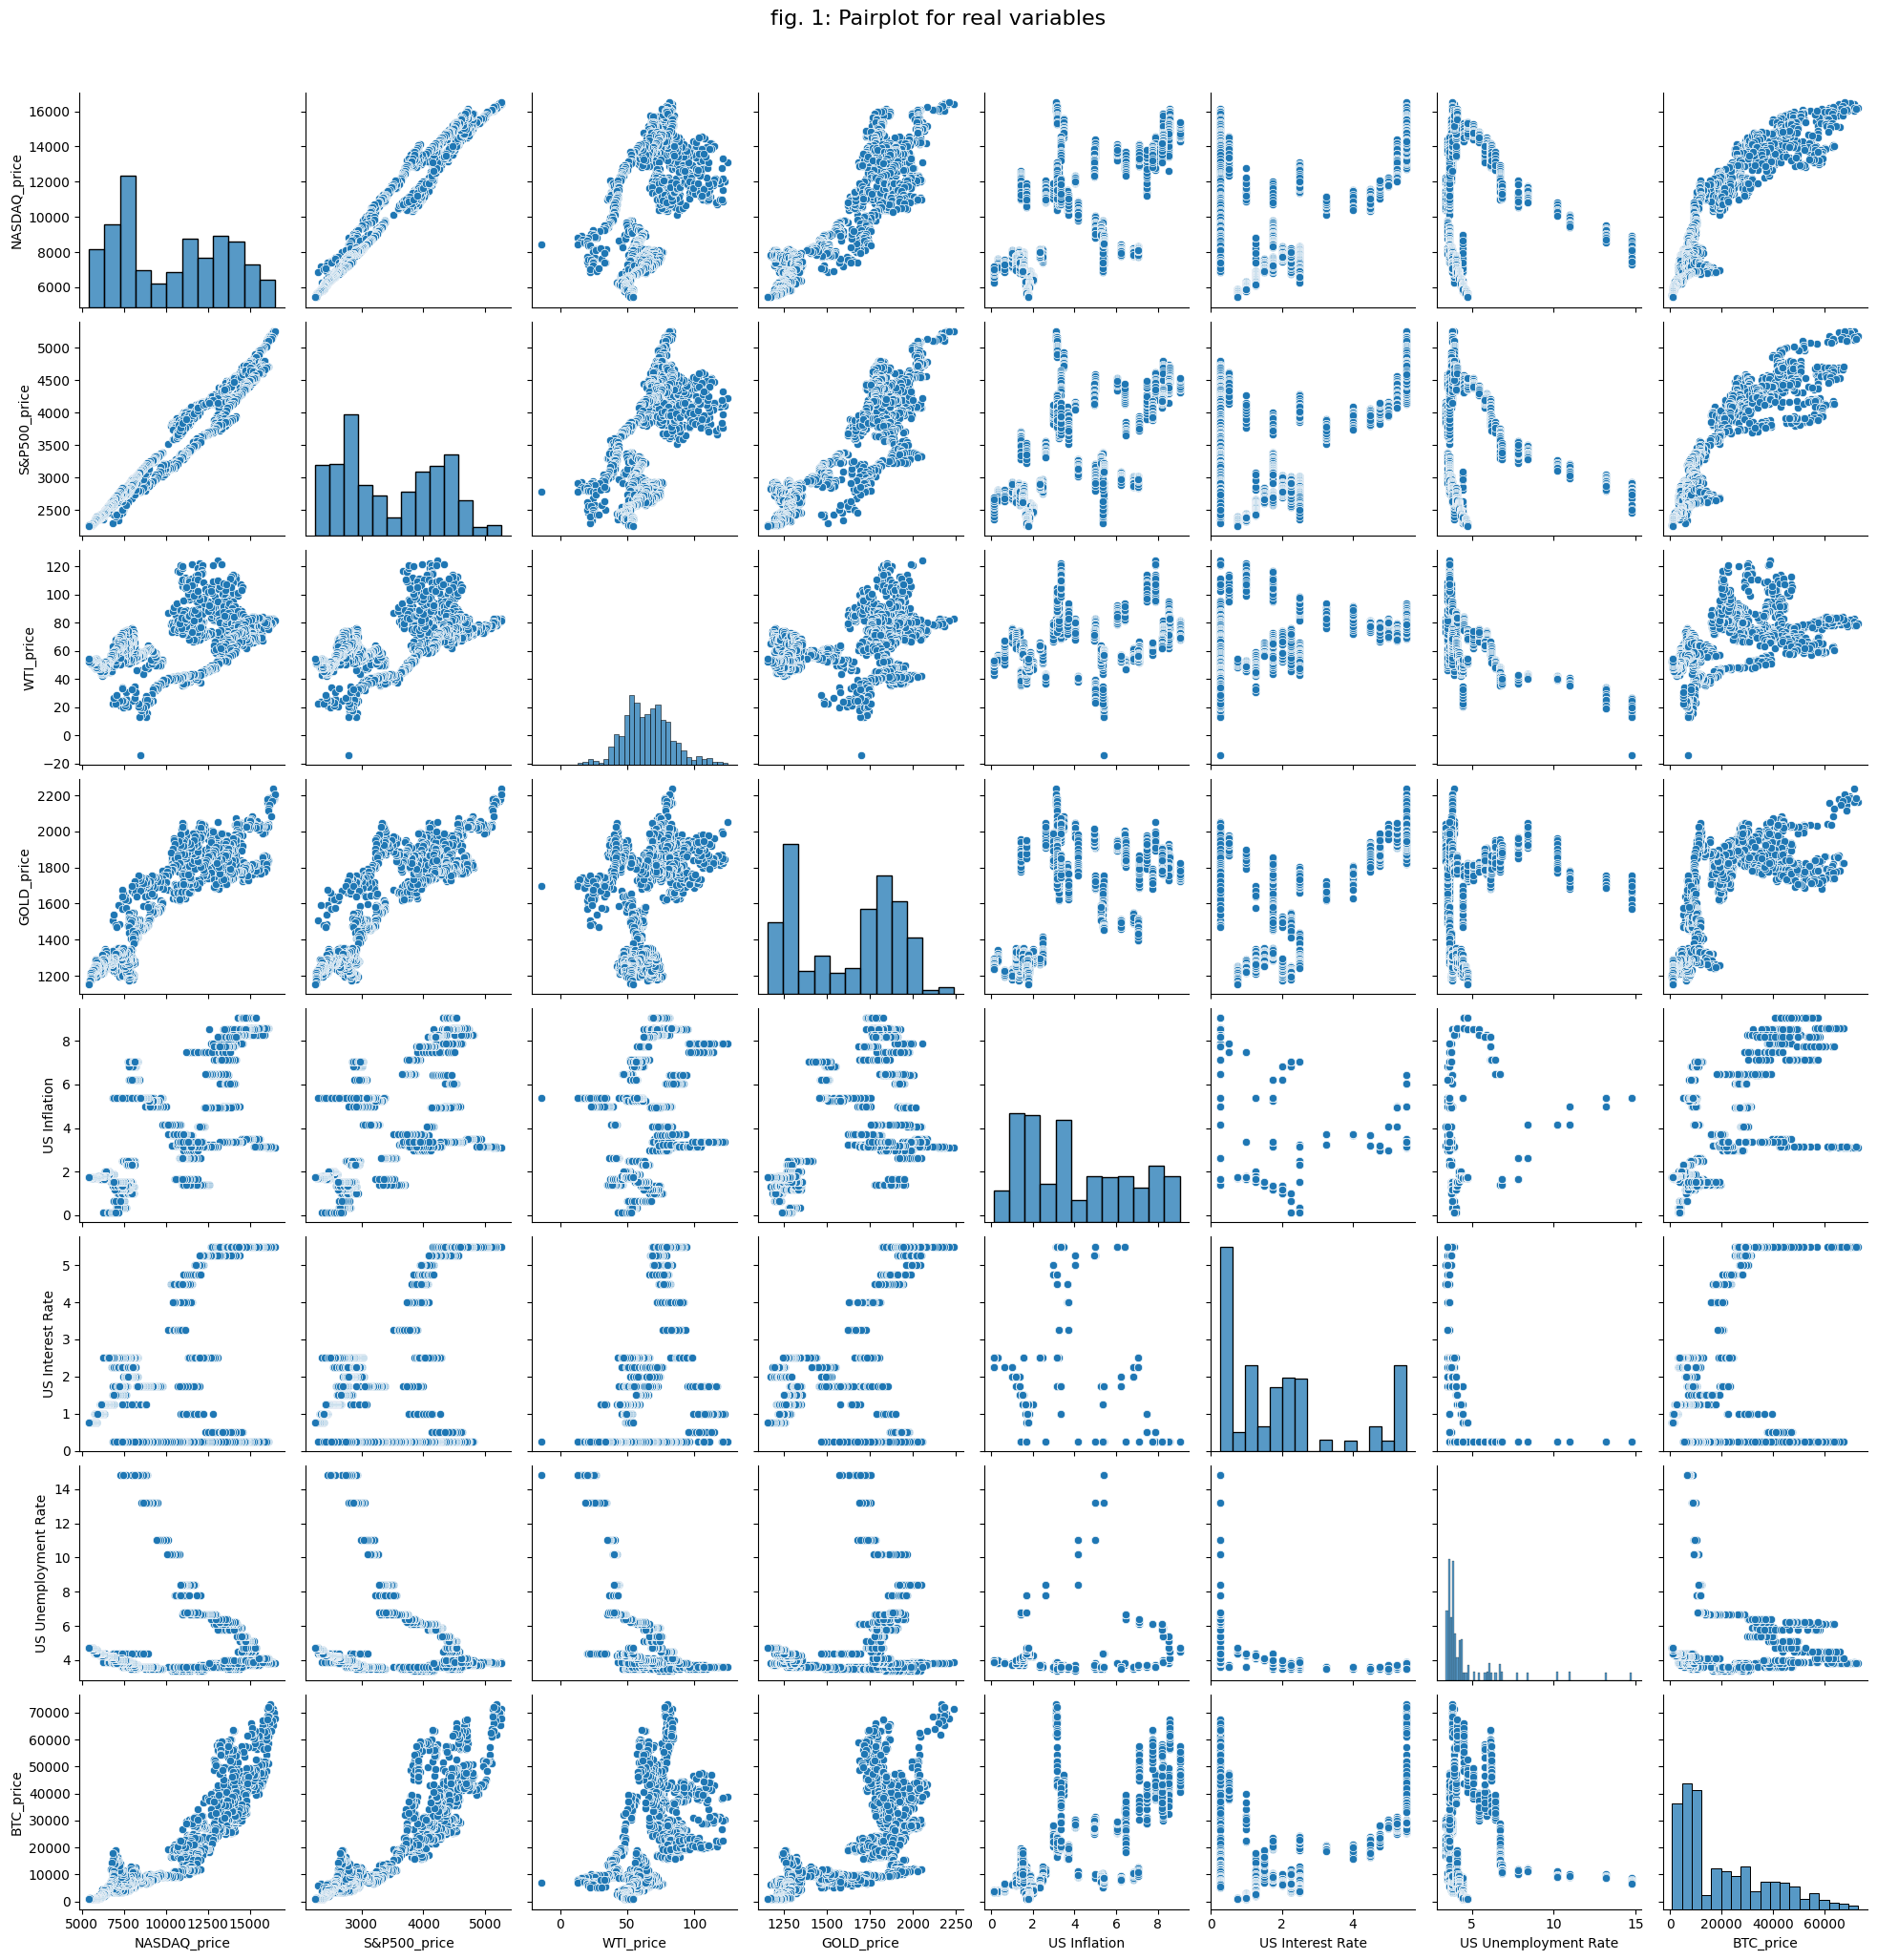

In [131]:
ll = sns.pairplot(merged_df)
ll.fig.suptitle("fig. 1: Pairplot for real variables", y = 1.03, fontsize = 16)

**Комментарий:** \
На диаграмах рассеивания видно, что целевая переменная BTC_price (примерно) линейно зависима от значения индексов NASDAQ и S&P500. Там скорее график похож на корень, но все же стремится к линейному. \
Чуит менее выражена линейная зависимость с инфляцией, но все же немного прослеживается. Примерно то же самое можно сказать про золото, но там график чуть менее логичный и линейный -- сначала резко вверх, потом на "флэт" чуть ниже вершины. Но какая-то зависимость все же виднеется. \
Сильне меньше выражена зависимость с безработицей и процентной ставкой. Там все достаточно размыто. Такую связь с ключом можно объяснить тем, что он не так часто меняется, но при этом может находиться на одном уровне в (условно) 2014 и 2022 году (очень условно). Но цена на биткоин в эти годы максимально разная, потому что есть множество других факторов. Более значительное воздействие ставка может оказывать в "момент", то есть при ожидании повышения/понижения ставки. \
\
Из интересного -- NASDAQ и S&P500 имеют ярко выраженную линейную взаимосвязь, но при этом график S&P500 и биткоина чуть более рассеянный (шире линия как бы), чем график NASDAQ и биткоина. \
Еще кстати интересно, что только у WTI есть нормальное распределение, хотя это достаточно неожиданно - цены по идее не должны его иметь. А цена биткоина похоже на распределение хи-квадрат.

Text(0.5, 1.0, 'fig. 2: Distribution of US Presidents in the dataset')

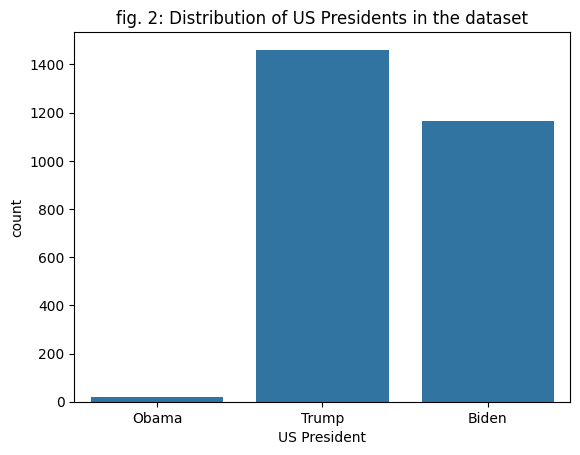

In [132]:
sns.countplot(x = 'US President', data = pres)
plt.title('fig. 2: Distribution of US Presidents in the dataset')

**Комментарий:** \
Сначала может показаться странным. Но на самом деле все достаточно просто и логично: Обама президентствовал до 20 января 2017 года, и анализируемый период начинается 1 января 2017 года, поэтому Обамы так мало. Байден все еще является президентом, то есть не весь срок прошел, в то время как Трамп уже полный срок отслужил. Поэтому Трампа больше всех, а Байден его догоняет, но не может догнать. Вот в январе 2025 года догонит. \
В целом как будто можно выбросить Обаму из списка, то есть анализировать только с 20 января 2017 года, но для полноты картины и общей логики мы оставим весь период.

Text(0.5, 1.0, 'fig. 4: Distribution of BTC price in the dataset')

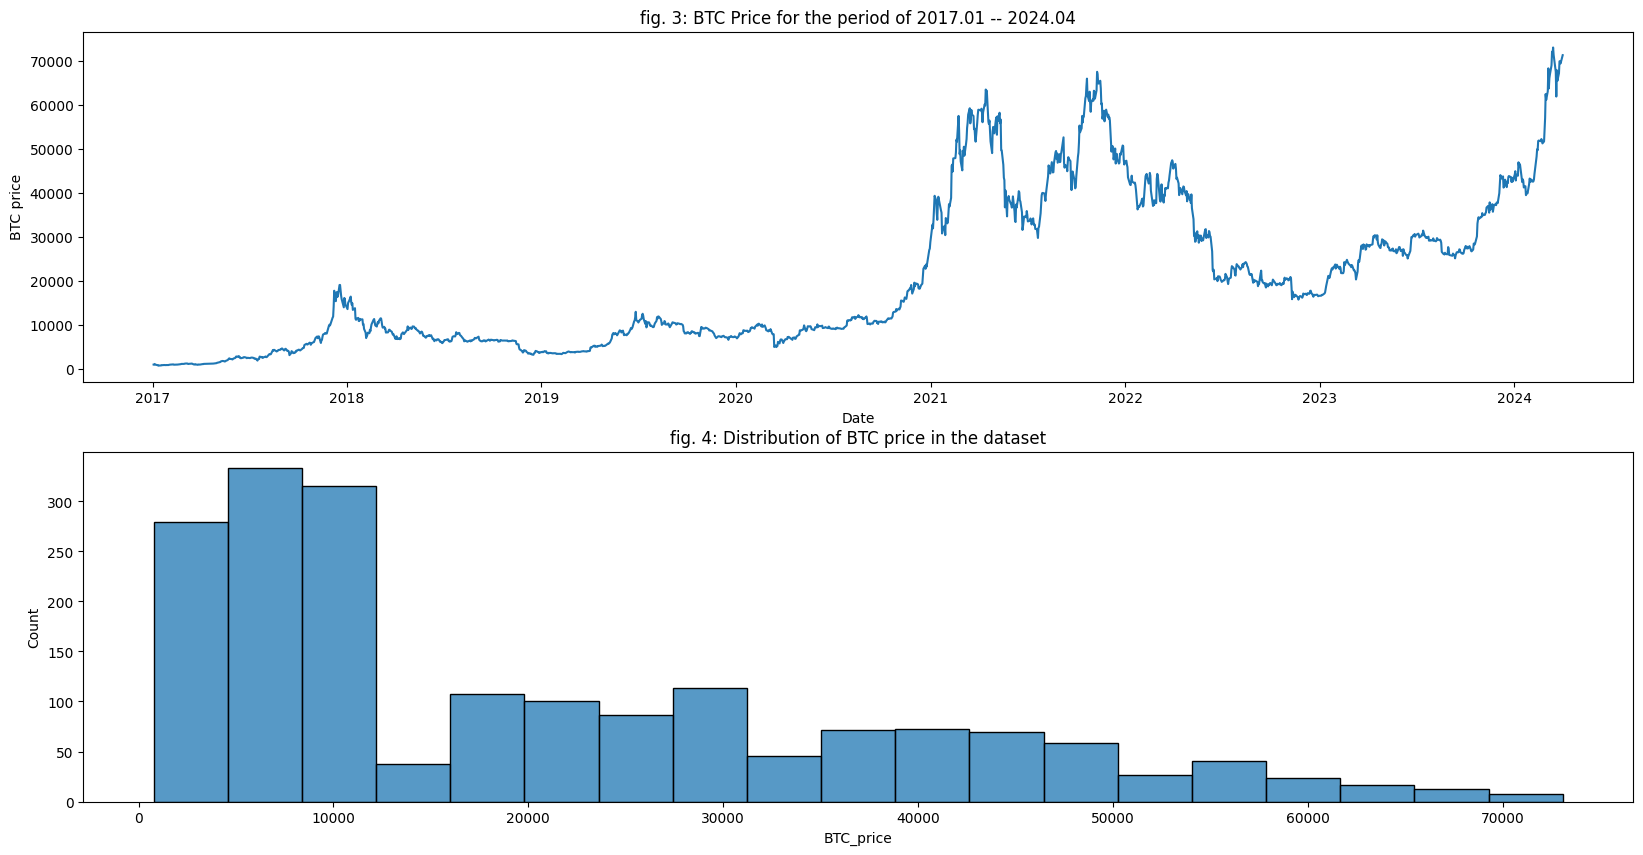

In [133]:
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
sns.lineplot(df[['Date', 'BTC_price']], x = df['Date'], y = df['BTC_price'], ax = ax[0])
ax[0].set_title('fig. 3: BTC Price for the period of 2017.01 -- 2024.04')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('BTC price')
sns.histplot(y, ax = ax[1])
ax[1].set_title('fig. 4: Distribution of BTC price in the dataset')

**Комментарий:** \
Первый график скорее ознокомительный, чтобы было видно, как вела себя цена биткоина во времени. \
\
Распределение цены биткоина не похоже на нормальное распределение, зато похоже на хи-квадрат. Это можно объяснить тем, что долгое время биткоин был в относительном флэте (2018-2020), поэтому частота низких цен выше. А после этого он начал уже волнами расти и падать, поэтому более высокие цены не так часто появлялись. \


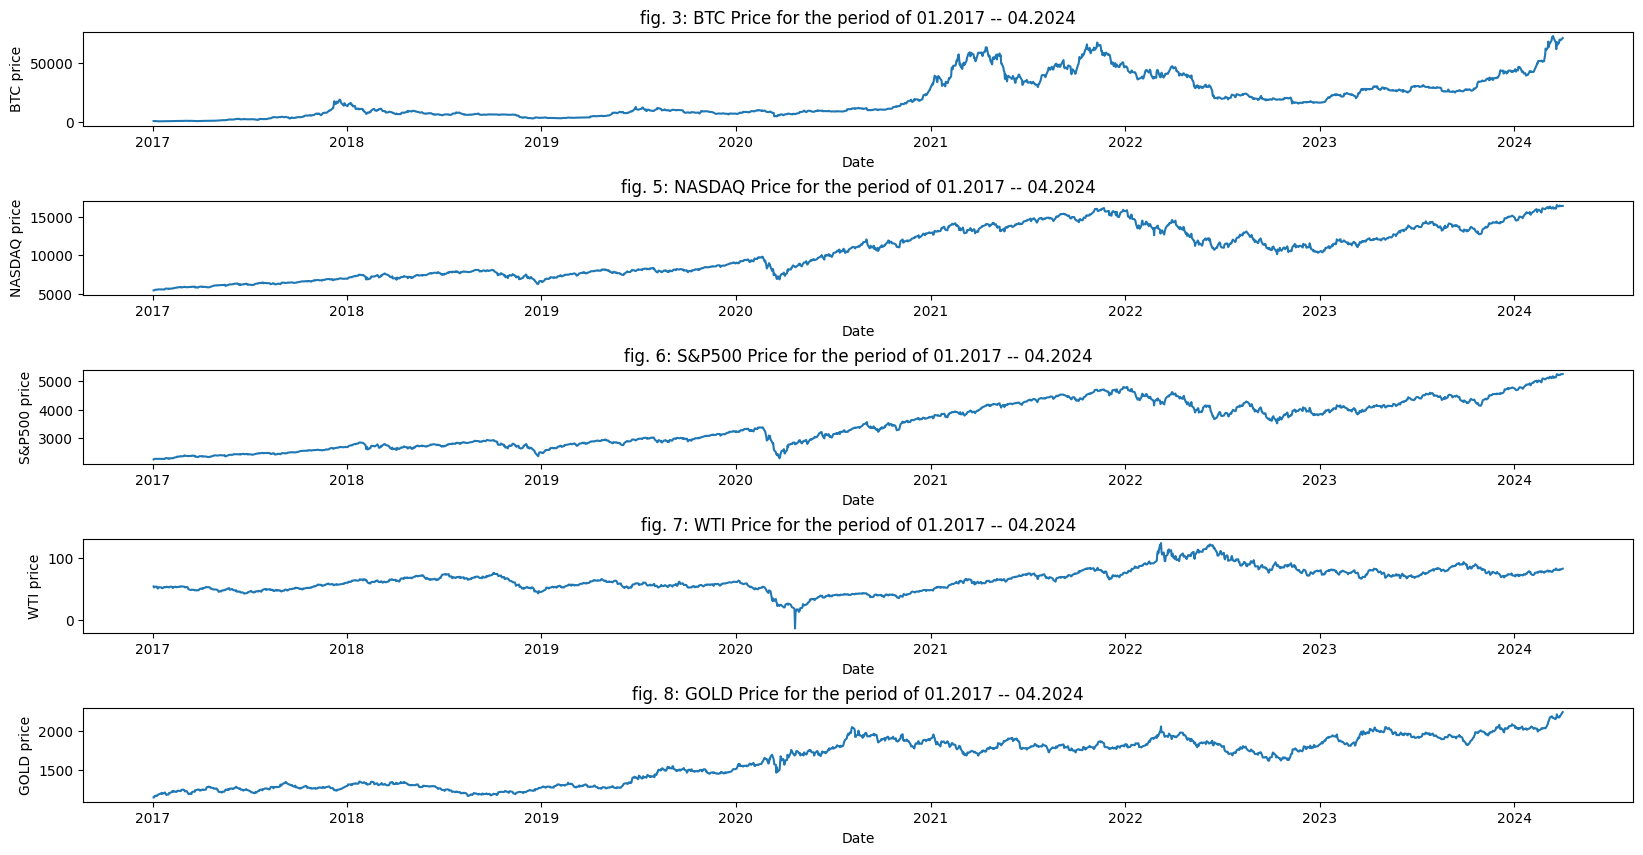

In [134]:
fig, ax = plt.subplots(5, 1, figsize = (20, 10))
for i, j, k in zip(['BTC_price', 'NASDAQ_price', 'S&P500_price', 'WTI_price', 'GOLD_price'], list(range(5)), [3] + list(range(5, 9))):
  sns.lineplot(df[['Date', i]], x = df['Date'], y = df[i], ax = ax[j])
  ax[j].set_title(f'fig. {k}: {i.split("_")[0]} Price for the period of 01.2017 -- 04.2024')
  ax[j].set_xlabel('Date')
  ax[j].set_ylabel(f'{i.split("_")[0]} price')
  plt.subplots_adjust(wspace=0.8, hspace=0.8)

**Комментарий:** \
Выше приведены графики цен/значений анализируемых активов и индексов. Видно, что биткоин во многом повторяет их движения, но не всегда. Иногда он растет вопреки остальным, иногда наоборот падает, когда остальные растут. \
Также видно, что S&P и NASDAQ очень сильно потворяют движения друг друга, видны моменты, когда все падает - это кризисы. \
\
Изначально хотел показать все значения на одном графике, но мешал биткоин высокими ценами. Потом хотел биткоин отдельно и остальное отдельно (два графика), но мешал насдак. В итоге пришлось сделать раздельные графики для всего. Но вроде тоже норм выглядит: читаемо и анализируемо.

In [135]:
df.head()

,Date,NASDAQ_price,S&P500_price,WTI_price,GOLD_price,US Inflation,US Interest Rate,US Unemployment Rate,BTC_price,US President_Biden,US President_Obama,US President_Trump
0,2024-04-01,16397.05,5257.97,83.14,2235.7,3.091,5.5,3.9,71333.48,1,0,0
1,2024-03-28,16377.23,5248.03,81.71,2193.6,3.091,5.5,3.8,69452.77,1,0,0
2,2024-03-27,16424.76,5226.31,81.29,2179.4,3.091,5.5,3.8,69991.90,1,0,0
3,2024-03-26,16446.85,5228.85,81.94,2182.7,3.091,5.5,3.8,69931.33,1,0,0
4,2024-03-25,16335.30,5219.52,80.85,2166.2,3.091,5.5,3.8,67234.09,1,0,0


# 5. Создаем новые признаки

На диаграммах рассеивания видно, что графики некоторых переменных похожи на графики корня. Поэтому создадим такие признаки. \
У золота не очень похоже, но что-то такое есть, поэтому тоже добавим его сюда.

In [136]:
df['NASDAQ_sqrt'] = np.sqrt(df['NASDAQ_price'])
df['S&P500_sqrt'] = np.sqrt(df['S&P500_price'])
df['GOLD_sqrt'] = np.sqrt(df['GOLD_price'])

Еще есть такое предположение, что по выходным активность на рынке меньше, из-за этого волатильность ниже, так что добавим категориальную переменную, которая показывает, является ли день рабочим (work day) или праздником/выходным (day off). Сначала напишем функцию, чтобы удобнее было.

In [137]:
class FinancialInfo:
    def __init__(self, start_date=None, end_date=None):
        # задание дефолтного значения первого дня
        if start_date is None:
            self.start_date = date(2010, 1, 1)
            self.start_date_text = self.start_date
        # задание пользовательского значения первого дня
        else:
            self.start_date_text = start_date
            sd = list(map(int, start_date.split('.')))
            self.start_date = date(sd[2], sd[1], sd[0])

        # задание дефолтного значения последнего дня
        if end_date is None:
            self.end_date = date.today()
            self.end_date_text = self.end_date
        # задание пользовательского значения последнего дня
        else:
            self.end_date_text = end_date
            ed = list(map(int, end_date.split('.')))
            self.end_date = date(ed[2], ed[1], ed[0])

    def get_holidays(self):
        '''Выгружает выходные и праздничные дни в соответствии с производственным календарем за даты, указанные в атрибутах объекта'''
        all_holidays = dict()

        years = np.arange(self.start_date.year, self.end_date.year + 1)
        months = np.arange(12)

        for y in years:
            calendar_url = f'https://calendar.yoip.ru/work/{y}-proizvodstvennyj-calendar.html'
            cal = requests.get(calendar_url,
                               headers={'User-Agent': UserAgent().chrome},
                               timeout=5)
            tree_cal = BeautifulSoup(cal.content, 'html.parser')
            for m in months:
                netraboty_m = [
                    int(i.text)
                    for i in tree_cal.find_all('table')[m].find_all(
                        'td', {'class': '_hd danger tt-hd'})
                ]
                netraboty_m.extend([
                    int(i.text)
                    for i in tree_cal.find_all('table')[m].find_all(
                        'td', {'class': '_hd warning tt-hd'})
                ])
                netraboty_m.extend([
                    int(i.text)
                    for i in tree_cal.find_all('table')[m].find_all(
                        'td', {'class': '_hd warning'})
                ])
                netraboty_m = [date(y, m + 1, i) for i in sorted(netraboty_m)]
                for day in netraboty_m:
                    all_holidays[day] = 'day off'

        calendar_df = pd.DataFrame.from_dict(all_holidays,
                                             orient='index',
                                             columns=['workday']).reset_index()
        calendar_df.rename(columns = {'index': 'Date'}, inplace = True)
        calendar_df['Date'] = pd.to_datetime(calendar_df['Date'])
        return calendar_df

    def get_all(self):
        # Создаем DataFrame с датами от start_date до end_date
        date_range = pd.date_range(start=self.start_date, end=self.end_date)
        df = pd.DataFrame(date_range, columns = ['Date'])
        df['Date'] = pd.to_datetime(df['Date'])

        df = pd.merge(df,
                      self.get_holidays(), on = 'Date',
                      how='left')

        df['workday'] = df['workday'].fillna('workday')

        return df

Применяем функцию, чтобы получить отдельную табличку с рабочими/выходными днями

In [138]:
days = FinancialInfo(start_date='01.01.2017', end_date='01.04.2024').get_all()
print(days.head())

        Date  workday
0 2017-01-01  day off
1 2017-01-02  day off
2 2017-01-03  day off
3 2017-01-04  day off
4 2017-01-05  day off


Мерджим датасет с этой табличкой и получаем готовый датасет с новым признаком!

In [139]:
df = pd.merge(df, days, on ='Date', how = 'left')
df.head()

,Date,NASDAQ_price,S&P500_price,WTI_price,GOLD_price,US Inflation,US Interest Rate,US Unemployment Rate,BTC_price,US President_Biden,US President_Obama,US President_Trump,NASDAQ_sqrt,S&P500_sqrt,GOLD_sqrt,workday
0,2024-04-01,16397.05,5257.97,83.14,2235.7,3.091,5.5,3.9,71333.48,1,0,0,128.050966,72.511861,47.283189,workday
1,2024-03-28,16377.23,5248.03,81.71,2193.6,3.091,5.5,3.8,69452.77,1,0,0,127.973552,72.443288,46.835884,workday
2,2024-03-27,16424.76,5226.31,81.29,2179.4,3.091,5.5,3.8,69991.90,1,0,0,128.159120,72.293222,46.684044,workday
3,2024-03-26,16446.85,5228.85,81.94,2182.7,3.091,5.5,3.8,69931.33,1,0,0,128.245273,72.310788,46.719375,workday
4,2024-03-25,16335.30,5219.52,80.85,2166.2,3.091,5.5,3.8,67234.09,1,0,0,127.809624,72.246246,46.542454,workday


# 6. Гипотезы

**Гипотеза 1:** \
NASDAQ и S&P оба включают в себя крупнейшие компании, просто S&P больше компаний включает и там условия немного другие. Но по идее у них расхождение должно быть относительно постоянным. Хотя в то же время не факт, потому что крупнейшие компании могут быть более волатильны и наоборот. Короче вот и проверим.

$$
H_0: μ_{nsdq} \neq μ_{sp} \\
H_1: μ_{nsdq} = μ_{sp}
$$

Text(0, 0.5, 'Значение разницы')

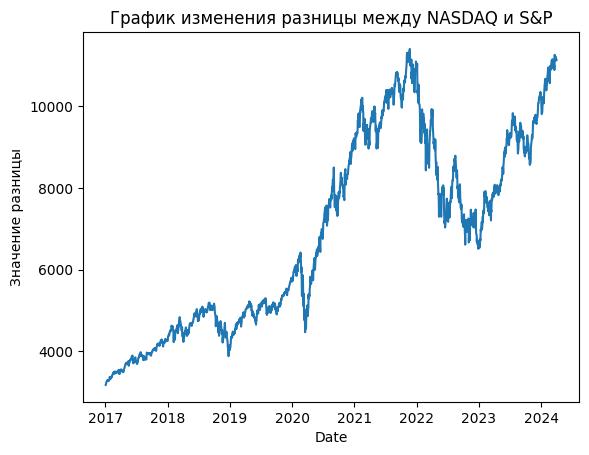

In [140]:
df['diff_mean'] = df.NASDAQ_price.mean() - df['S&P500_price'].mean()
df['diff'] = df.NASDAQ_price - df['S&P500_price']
sns.lineplot(df[['Date', 'diff']], x = df['Date'], y = df['diff'])
plt.title('График изменения разницы между NASDAQ и S&P')
plt.xlabel('Date')
plt.ylabel('Значение разницы')

Ладно, гипотеза не подтвердился даже графиком, поэтому отмена.

**Гипотеза 2:** \
Окей, ну может у них хотя бы распределения у насдака и сп похожи. Сначала посмотрим на графики.

Text(0.5, 1.0, 'Распределение значений S&P500')

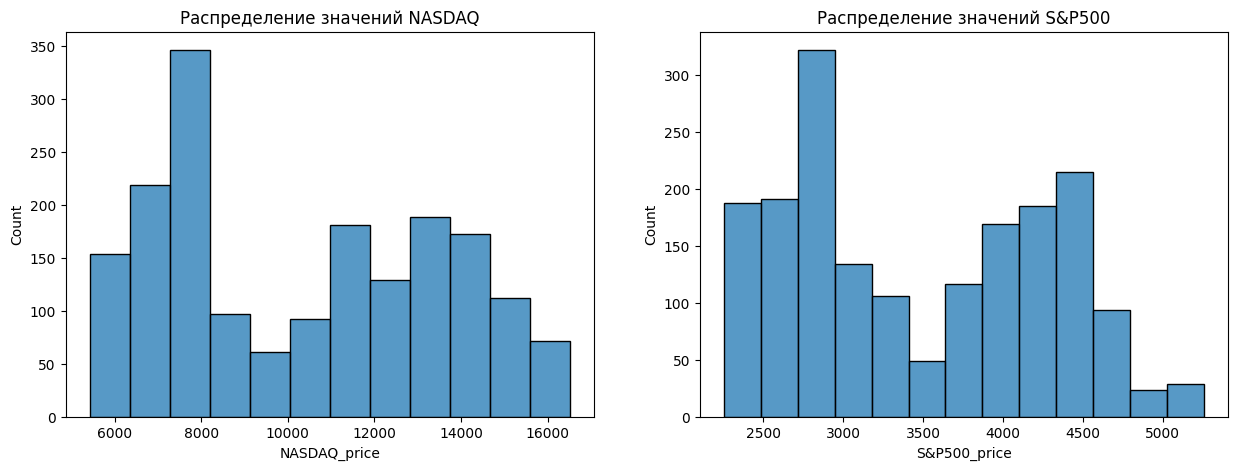

In [141]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(df.NASDAQ_price, ax = ax[0])
ax[0].set_title('Распределение значений NASDAQ')
sns.histplot(df['S&P500_price'], ax = ax[1])
ax[1].set_title('Распределение значений S&P500')

Штош, графики в целом походи. Да, не слишком, но все-таки стоит проверить гипотезу через статистические тесты. Будем использовать для этого тесты Вилкоксона-Манна-Уитни и Колмогорова-Смирнова. Если p-value, которые они покажут, будут выше уровня значимости (зададим его на уровне $\alpha = 0.5$), то мы гипотеза $H_0$ - случайные величины одинаково распределены - не будет отвергнута. Let's get to it.

In [142]:
print('P-value теста Вилкоксона-Манна-Уитни:', stats.mannwhitneyu(df.NASDAQ_price, df['S&P500_price']).pvalue)
print('P-value теста Колмогорова_Смирнова:', stats.ks_2samp(df.NASDAQ_price, df['S&P500_price']).pvalue)

P-value теста Вилкоксона-Манна-Уитни: 0.0
P-value теста Колмогорова_Смирнова: 0.0


Oh look at that... P-value прям совсем маленькие, поэтому мы вообще ни на каком уровне не может принять эту гипотезу. \
Я ошибся, я могу один раз ошибиться? (возможно, не один)

**Гипотеза 3:** \
Мы там выше писали, что распределение цены биткиона похоже на хи-квадрат. Давайте проверим это статистически. Но сначала вот график-напоминание.

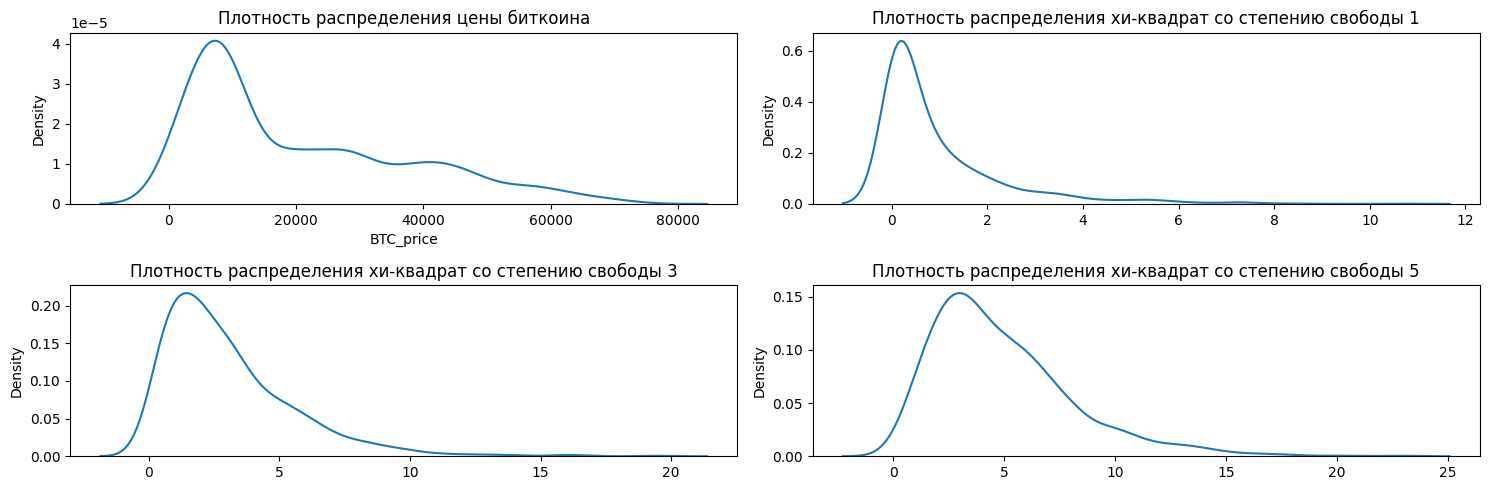

In [143]:
fig, ax = plt.subplots(2, 2, figsize = (15, 5))
sns.kdeplot(df['BTC_price'], ax = ax[0, 0])
ax[0, 0].set_title('Плотность распределения цены биткоина')
sns.kdeplot(stats.chi2.rvs(1, size=1000), ax = ax[0, 1])
ax[0, 1].set_title('Плотность распределения хи-квадрат со степению свободы 1')
sns.kdeplot(stats.chi2.rvs(3, size=1000), ax = ax[1, 0])
ax[1, 0].set_title('Плотность распределения хи-квадрат со степению свободы 3')
sns.kdeplot(stats.chi2.rvs(5, size=1000), ax = ax[1, 1])
ax[1, 1].set_title('Плотность распределения хи-квадрат со степению свободы 5')

plt.tight_layout()

Стало понятно, что это скорее какая-то комбинация хи-квадрат с разными степенями свободы, но больше всего на что-то типа степень свободы 3 похоже. Давайте проверим это с помощью тестов Колмогорова-Смирнова и встроенной функции. Они оба сравнивают теоретическое и эмперическое распределение. Логика с p-value такая же, как раьше.

In [144]:
print('P-value теста на распределение хи-квадрат', stats.chisquare(df.BTC_price).pvalue)
print('P-value теста Колмогорова-Смирнова', stats.kstest(df.BTC_price, 'chi2', args=(3,)).pvalue)

P-value теста на распределение хи-квадрат 0.0
P-value теста Колмогорова-Смирнова 0.0


Все опять достаточно грустно. Ну как сказать, объективно, просто мы были не правы. Оказывается, вообще не хи-квадрат распределение. Ну и ладно, значит не будем работать с битком как с хи-квадратом.

# 7. Обучение модели.

Предсказание цены биткоина - это задача регрессии. Нам нужно предсказать значение целевой переменной в виде вещественного числа. Для оценки качества модели будем использовать традиционные метрики для такого типа задач - это средняя квадратичная ошибка и средняя абсолютная ошибка.

In [145]:
# У нас есть один категориальный признак - workday, нужно его закодировать, это лучше сделать ручками, потому что всего два значения:
df['is_workday'] = df['workday'].apply(lambda x: 1 if x == 'workday' else 0)
df = df.drop(['workday'], axis =1)

In [146]:
# Далее поделим выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X = df.drop('BTC_price', axis=1)
X = X.drop('Date', axis = 1)
y = df['BTC_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
# Нам нужно отшкалировать признаки, чтобы наша модель лучше работала
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## 7.1 Обучение линейной регрессии с регуляризацией и без

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_sc, y_train)
y_train_pred = linear_reg.predict(X_train_sc)
msetrain = mean_squared_error(y_train, y_train_pred)
maetrain = mean_absolute_error(y_train, y_train_pred)
y_test_pred = linear_reg.predict(X_test_sc)
msetest = mean_squared_error(y_test, y_test_pred)
maetest = mean_absolute_error(y_test, y_test_pred)

print("MSE train", msetrain)
print('MAE train', maetrain)
print("MSE test", msetest)
print('MAE test', maetest)

MSE train 30561848.39487249
MAE train 3969.9648607381832
MSE test 26868979.202298786
MAE test 3763.0154633261577


In [149]:
linear_weights = pd.Series(linear_reg.coef_, index=X.columns, name='Linear') # посмотрим на веса признаков - проверим на переобученность модели (хотя результаты метрик на трейне и тесте об этом не свидетельствуют)
print(linear_weights)

NASDAQ_price            15894.347100
S&P500_price            24931.318620
WTI_price                -769.124820
GOLD_price              60495.450932
US Inflation             2326.415412
US Interest Rate        -2410.259491
US Unemployment Rate     -762.374564
US President_Biden       2087.807695
US President_Obama       -951.987793
US President_Trump      -1933.943612
NASDAQ_sqrt            -21270.126538
S&P500_sqrt            -18051.052407
GOLD_sqrt              -63269.092093
diff_mean                   0.000000
diff                    12704.257094
is_workday               -615.290888
Name: Linear, dtype: float64


In [150]:
# Попорбуем добавить Лассо регуляризацию, добавим алгоритм для подбора наиболее подходящего гиперпараметра
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas=alphas, cv=5) # параметр кросс-валидации берем равным 5 чуйке автора
lasso_cv.fit(X_train_sc, y_train)
average_mse = np.mean(lasso_cv.mse_path_, axis=1)
best_alpha_idx = np.argmin(average_mse)
best_alpha = lasso_cv.alphas_[best_alpha_idx]

print("Лучшее значение:", best_alpha)

Лучшее значение: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6601745720.571213, tolerance: 30595146.61495093
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14229134382.192425, tolerance: 30595146.61495093
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15929492231.063366, tolerance: 30595146.61495093
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceW

In [151]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.021e+10, tolerance: 3.805e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [152]:
y_pred_lasso =  lasso.predict(X_test_sc)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,  y_pred_lasso)

print(f"MSE Linear: {msetest}")
print(f"MAE Linear: {maetest}")
print(f"MSE Lasso: {mse_lasso}")
print(f"MAE Lasso: {mae_lasso}")

MSE Linear: 26868979.202298786
MAE Linear: 3763.0154633261577
MSE Lasso: 26407921.25078943
MAE Lasso: 3676.496599432983


## 7.2 Обучение модели kNN

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()
neighbors_list = [3, 5, 10, 15, 20, 30, 50] # задаем возможный список оптимального количества соседей


param_grid = {'n_neighbors': neighbors_list}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5) #Используем GridSearchCV для подбора оптимального количества соседей
grid_search.fit(X_train_sc, y_train)

optimal_neighbors = grid_search.best_params_['n_neighbors']
optimal_model = KNeighborsRegressor(n_neighbors=optimal_neighbors)
optimal_model.fit(X_train_sc, y_train)

y_pred = optimal_model.predict(X_test_sc)
mse_knn = mean_squared_error(y_test, y_pred) #используем те же самые метрики качества модели для сопоставимости результатов
mae_knn =  mean_absolute_error(y_test, y_pred)
print(f"Оптимальное количество соседей: {optimal_neighbors}")
print(f"MSE: {mse_knn}")
print(f'MAE: {mae_knn}')
# здесь интересно, что модель обученная на нешкалированных данных сильно хуже, той что училась на шкалированных. Я не совсем понимаю почему это работает в кнн.

Оптимальное количество соседей: 3
MSE: 3191989.1442645746
MAE: 886.4541194393662


## Добавляем немного деревьев

In [157]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, min_impurity_decrease=100, random_state = 42) #рещили попробовать добавить деревья (мы не прооходили их в курсе), гиперпараметры ручками потыкали
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions)
mae_rf =  mean_absolute_error(y_test, predictions)
print(mse_rf)
print(mae_rf)

3227657.660551867
988.3890256180174


### Выводы

Как ни странно самую маленьнкую ошибку на тестовой выборке дала модель обученная методом kNN, чуть хуже справляются деревья, а совсем плохо показывает обычная себя линейная регрессия, и даже регуляризация ей не помогла. Результаты немного удивляют - мы делали ставку на последнюю из вышеперечисленных.
Касаемо качества полученных моделей, мы можем ориентироваться на результаты kNN, то есть наша модель ошибается в среднем на 886 долларов по модулю, кажется, модель неприменима в реальной жизни. Вероятнее всего это связано сильной, иногда необъяснимой, волатильностью цены биткоина и скудности нашего датасета.